In [66]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

**Baca dataset dari drive**

In [67]:


df = pd.read_csv("clothing_style_recommendation.csv")

**Encode features**

In [68]:
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

**Pisahkan predictor dan predicted**

In [69]:
X = df[["Day", "Location", "Activity"]][:500]
y = df["Style"][:500]

**Tentukan model sebagai decision tree ID3 dan train**

In [70]:
clf = DecisionTreeClassifier(criterion="entropy", random_state=42)
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=42)

**[OPSIONAL] Buat gambar dari tree yang dibuat**

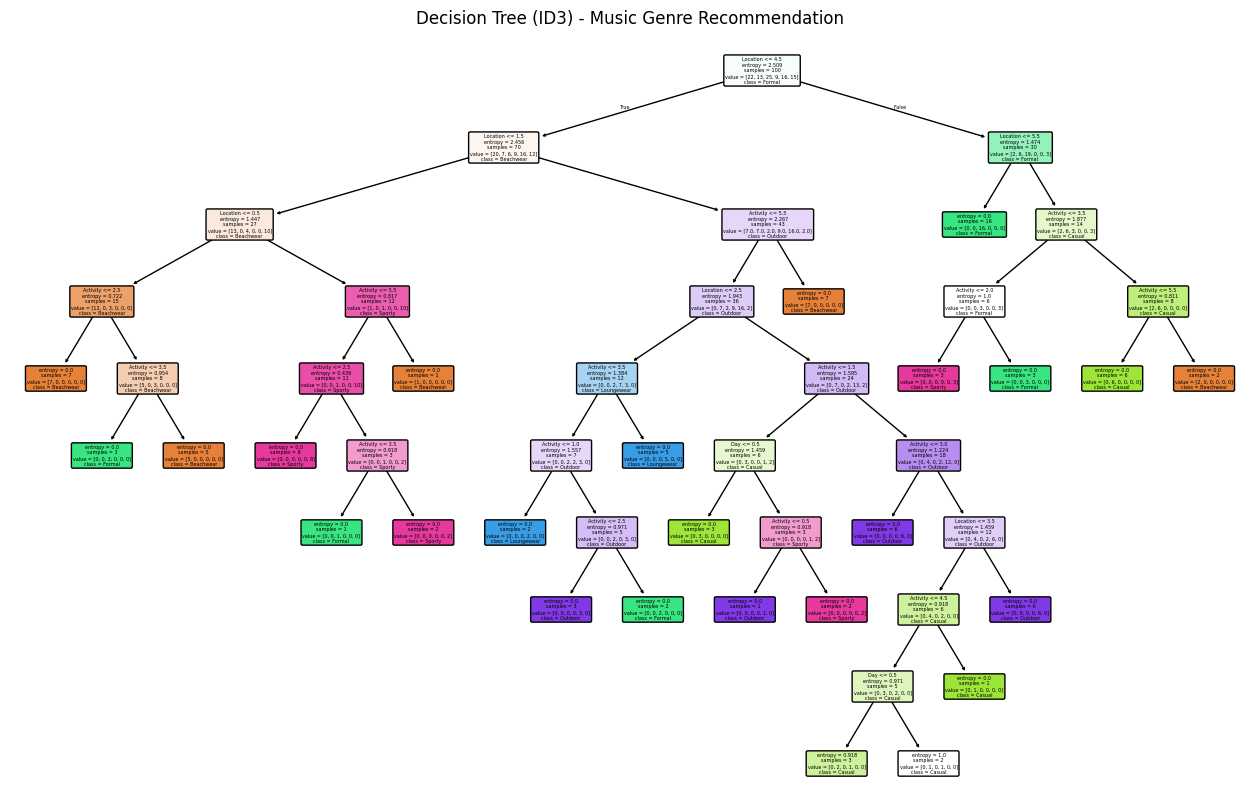

In [71]:
plt.figure(figsize=(16, 10))
plot_tree(clf,
          feature_names=["Day", "Location", "Activity"],
          class_names=label_encoders["Style"].classes_,
          filled=True,
          rounded=True)
plt.title("Decision Tree (ID3) - Music Genre Recommendation")
plt.show()

**Contoh eksekusi inference**

In [72]:
example = pd.DataFrame({
    "Day": ["Weekday"],
    "Location": ["Mall"],
    "Activity": ["Dining"]
})

# Encode the example using the same label encoders
for column in example.columns:
    example[column] = label_encoders[column].transform(example[column])

# Predict and decode result
pred_encoded = clf.predict(example)
pred_genre = label_encoders["Style"].inverse_transform(pred_encoded)
print(f"Recommended genre: {pred_genre[0]}")

Recommended genre: Casual
